In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects
import numpy as np
from dataclasses import dataclass
import pandas as pd
import vice
from scipy.interpolate import interp1d
from scipy.integrate import quad
import random

using vice version  1.4.0.dev2


In [3]:
from surp.analysis.vice_model import vice_model
from surp.analysis import apogee_analysis as aah
import seaborn as sns
import arya


In [6]:
fiducial = vice_model("../out/C11_f0.2_beta0.001_nthreads8.json")

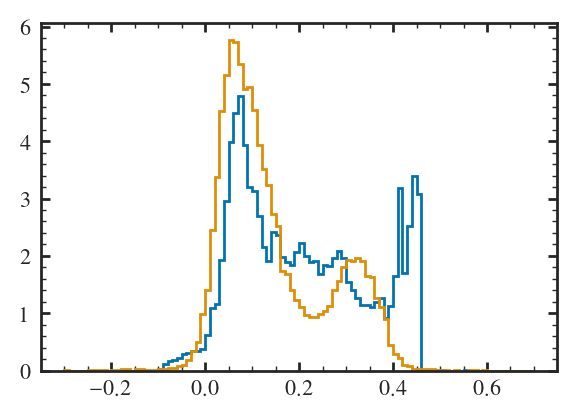

In [14]:
df = fiducial.history

plt.hist(df["[o/fe]"], 100, histtype="step", density=True, range=(-0.3, 0.7))
plt.hist(aah.subgiants["MG_FE"], 100, histtype="step", density=True, range=(-0.3, 0.7));

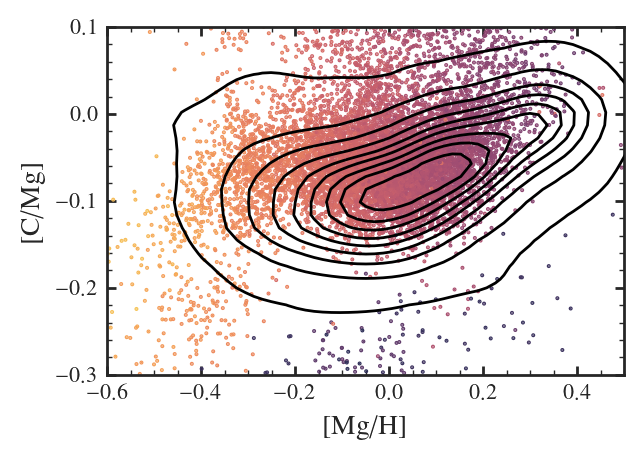

In [5]:
s = fiducial.stars
N = len(s)
dx = 0.03
dy = 0.03
aah.plot_contour("[mg/h]", "[c/mg]", zorder=3)

plt.scatter(s["[mg/h]"] + np.random.normal(0, dx, N), s["[c/mg]"] + np.random.normal(0, dy, N), 
             c = s["r_origin"], s=0.2, zorder=2)
plt.xlim(-0.6, 0.5)
plt.ylim(-0.3, 0.1)
plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

plt.savefig("fiducial_scatter.pdf")

In [ ]:
sns.scatterplot(fiducial.history, x="time", y="sfr", hue="R")

<Axes: xlabel='time', ylabel='sfr'>

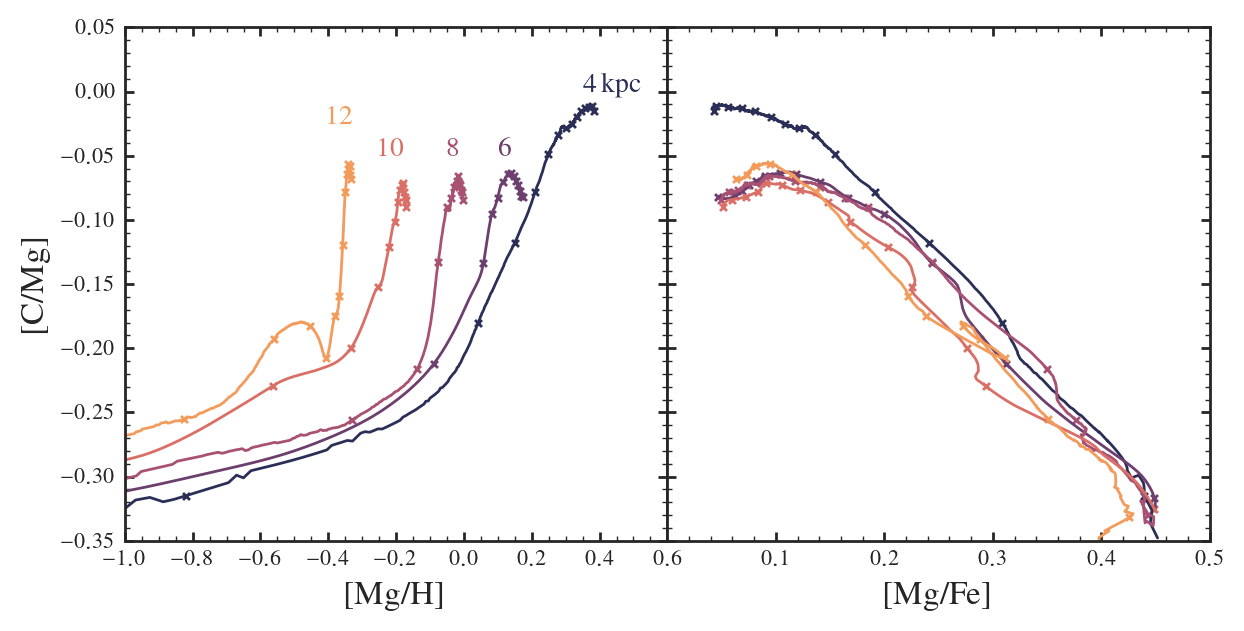

In [5]:

fig, axs = plt.subplots(1, 2, sharey=True, gridspec_kw={"wspace": 0}, figsize=(7, 10/3))

plt.sca(axs[0])
fiducial.plot_R_slices("[mg/h]", "[c/mg]", legend=False)

colors = plt.get_cmap()(np.linspace(0.8, 0, 5))

coords = [
    (-0.4, -0.025),
    (-0.25, -0.05),
    (-0.05, -0.05),
    (0.1, -0.05),
    (0.35, 0.0)
]

texts = [
    "12",
    "10",
    "8",
    "6",
    r"4\,kpc"
]
for i in range(5):
    plt.text(*coords[i], texts[i], color=colors[i])

plt.xlabel(r"[Mg/H]")
plt.ylabel(r"[C/Mg]")
plt.xlim(-1, 0.6)
plt.ylim(-0.35, 0.05)


plt.sca(axs[1])
fiducial.plot_R_slices("[mg/fe]", "[c/mg]", legend=False)

plt.xlabel(r"[Mg/Fe]")
plt.ylabel("")
plt.xlim(0, 0.5)
plt.ylim(-0.35, 0.05)
plt.xticks(np.arange(0.1, 0.6, 0.1))

plt.savefig("evo_tracks.pdf")

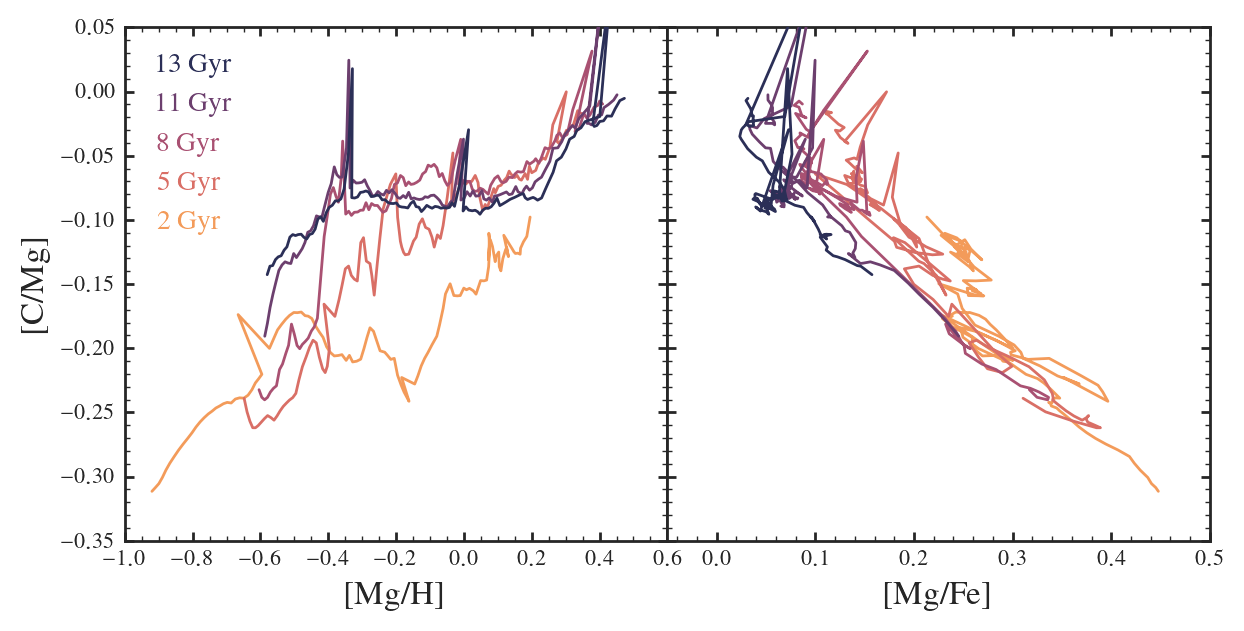

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, gridspec_kw={"wspace": 0}, figsize=(7, 10/3))

plt.sca(axs[0])
fiducial.plot_t_slices("[mg/h]", "[c/mg]")




plt.xlabel(r"[Mg/H]")
plt.ylim(-0.35, 0.05)
plt.ylabel(r"[C/Mg]")
plt.xlim(-1, 0.6)

plt.sca(axs[1])


fiducial.plot_t_slices("[mg/fe]", "[c/mg]",legend=False)



plt.xlabel(r"[Mg/Fe]")
plt.ylabel("")
plt.xlim(-0.05, 0.5)

plt.savefig("evo_slices.pdf")

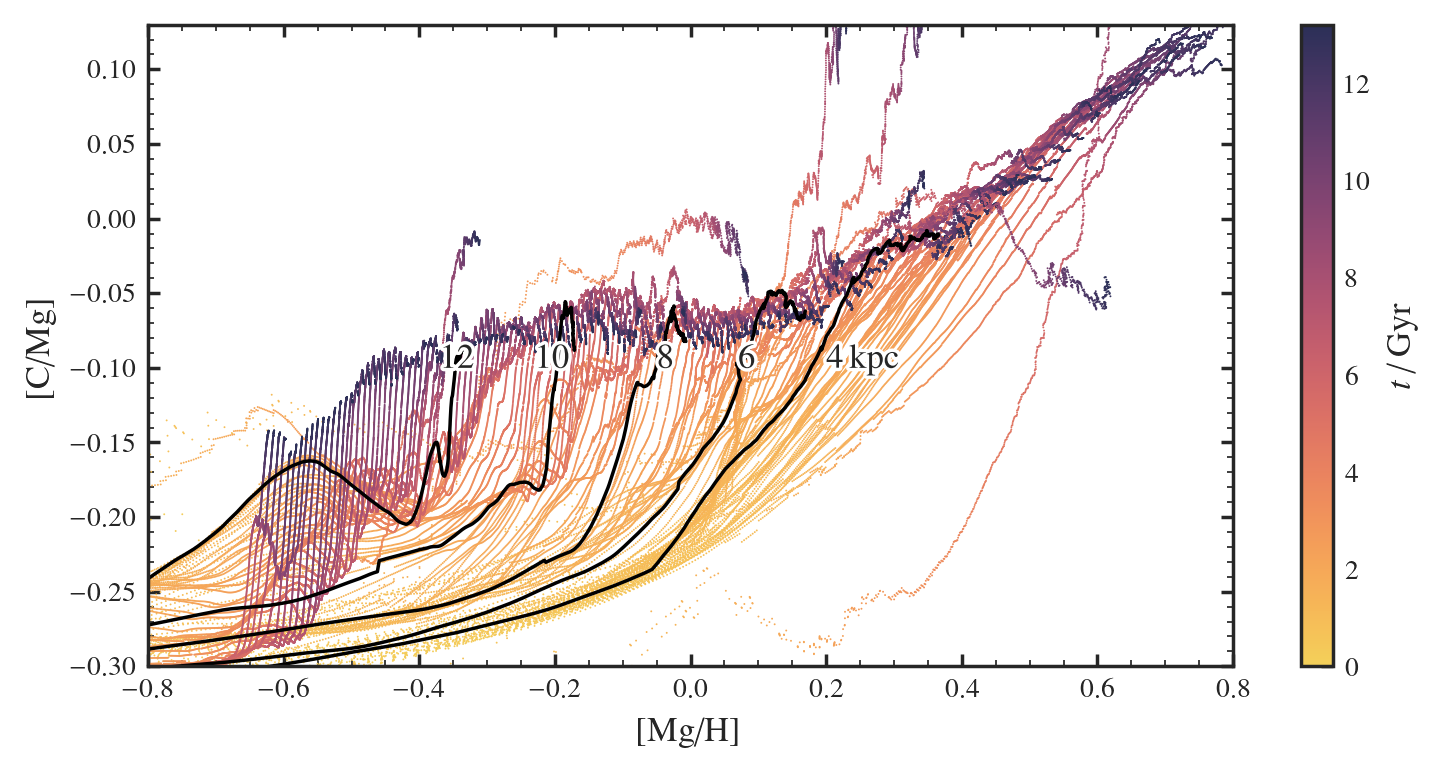

In [11]:
plt.figure(figsize=(7, 10/3), dpi=250)
h = fiducial.history

for R in [4, 6, 8, 10, 12]:
    df = h[np.isclose(h.R, R - 0.05)]
    plt.plot(df["[o/h]"], df["[c/o]"], color="k")

    
    
coords = [
    (-0.37, -0.1),
    (-0.23, -0.1),
    (-0.05, -0.1),
    (0.07, -0.1),
    (0.2, -0.1)
]

texts = [
    "12",
    "10",
    "8",
    "6",
    r"4\,kpc"
]

for i in range(5):
    text = plt.text(*coords[i], texts[i])
    text.set_path_effects([mpl.patheffects.Stroke(linewidth=2, foreground='w'),
                   mpl.patheffects.Normal()])

sns.scatterplot(h, x="[o/h]", y="[c/o]", hue="time", s=0.3, alpha=1, legend=False, edgecolor="none", palette="arya_r", rasterized=True)
plt.xlim(-0.8, 0.8)
plt.ylim(-0.3, 0.13)
arya.Colorbar(clim=(0, 13.2), label=r"$t\,/\,{\rm Gyr}$", cmap="arya_r")


plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

plt.savefig("all_the_tracks.pdf")

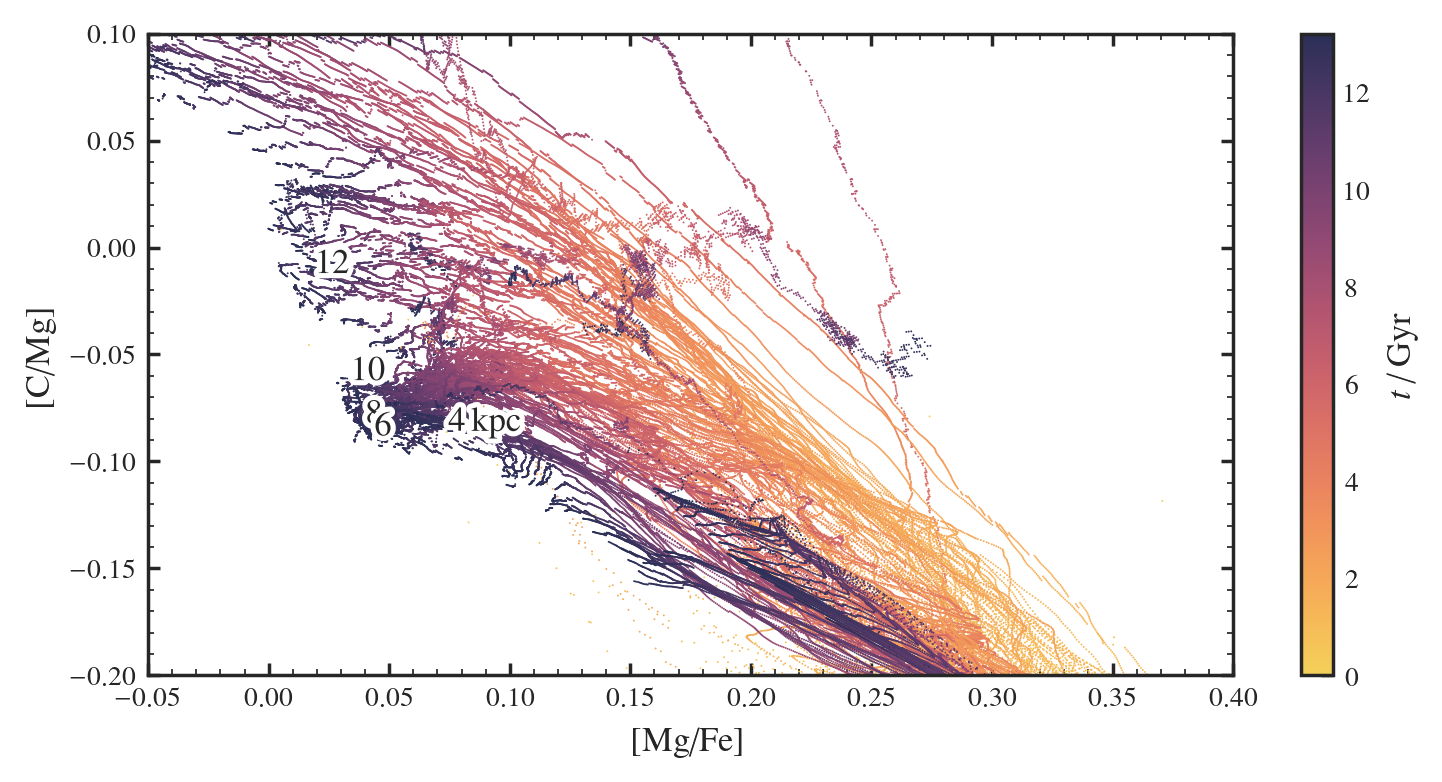

In [10]:
plt.figure(figsize=(7, 10/3), dpi=250)


filt = fiducial.history["[o/h]"] > -0.15
filt &= fiducial.history["[o/h]"] < -0.05
h = fiducial.history
cb = arya.Colorbar(clim=(0, 13.2), label=r"$t\,/\,{\rm Gyr}$", cmap="arya_r")

coords = []

for R in np.sort(h.R.unique()):
    dfa = h[h.R == R]
    s = 1# 0*(0.05 - np.abs(dfa["[o/h]"] + 0.10))
    plt.scatter(dfa["[o/fe]"], dfa["[c/o]"], c=cb(dfa.time), s=0.3, ec="none", rasterized=True)
    if any(np.isclose(R+0.05, [4, 6, 8, 10, 12])):
        coords.append((
            dfa["[o/fe]"][-1], 
            dfa["[c/o]"][-1]
        ))

        # plt.scatter(dfa["[o/fe]"], dfa["[c/o]"], s=0.3, c=cb(dfa.time), ec="none", zorder=1)
    

texts = [
    "12",
    "10",
    "8",
    "6",
    r"4\,kpc"
]

for i in range(len(coords)):
    text = plt.text(*coords[i], texts[i], zorder=20)
    text.set_path_effects([mpl.patheffects.Stroke(linewidth=3, foreground='w'),
                   mpl.patheffects.Normal()])
    
plt.xlim(-0.05, 0.4)
plt.ylim(-0.2, 0.1)
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")
plt.savefig("coofe_tracks.pdf")